<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4:  Using Yelp cost estimates for estimating neighborhood affluency

<i>
                
                Submitted by Shannon Bingham and Roy Kim
</i>

 
## Problem Statement
This tool will estimate the affluence of a neighborhood based on the number of `$` of businesses and services (according to Yelp) in a given neighborhood. (`$`, `$$`, `$$$`, `$$$$`) This tool will expect to get, as an input, a list of zip codes or names of neighborhoods and will estimate the wealth of the locality. While traditional methods typically estimate wealth of a locality based on demographic characteristics (e.g. income or unemployment rate), the novelty of this approach is in its use of big data related to commercial activity and cost of product and services as an indicator for affluency.

## Notebook Description
_This notebook will use XGBoost to create a predictive model that predicts AGI based on the Yelp features that were engineered. We will use the Principal Component Analysis in this notebook to create a model for dimensionality reduction, as well._

In [1]:
import pandas as pd
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/composite_zip_WI.csv')

In [67]:
# df = df.drop(['median_income'], axis=1)
# df = df.drop([0,4,10])

In [3]:
X = df.drop(['average_agi','zipcode'], axis=1)
y = df['average_agi']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [4]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train))
X_test = pd.DataFrame(ss.transform(X_test))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# XGBoost parameters that will be gridsearched over
xgb_params = {
    'eta' : [0.1,0.3],
    'min_child_weight' : [1, 2, 3],
    'max_depth' : [3, 5 ,7, 9],
    'colsample_bytree' : [.5, .7, .9, 1]
}

# Initializing GridSearch over XGBoost
grid = GridSearchCV(
    XGBRegressor(),
    xgb_params,
    cv = 5,
    verbose = 1,
    return_train_score = True
)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.8min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'eta': [0.1, 0.3], 'min_child_weight': [1, 2, 3], 'max_depth': [3, 5, 7, 9], 'colsample_bytree': [0.5, 0.7, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [6]:
# The best_params_ attribute shows the highest scoring 
# hyperparameters that GridSearch found after fitting
grid.best_params_

{'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 3, 'min_child_weight': 1}

In [7]:
# The best_score_ is the highest R2 score after fitting
# of all the hyperparameter combinations 
grid.best_score_

-0.12548594598782553

In [8]:
# Using the best parameters, I made a list of predictions to compare to the test split
y_hat = grid.predict(X_test)

# Getting the RMSE of test split vs. predictions
rmse = round(mean_squared_error(y_test,y_hat) ** 0.5, 3)
print(rmse)

20852.285


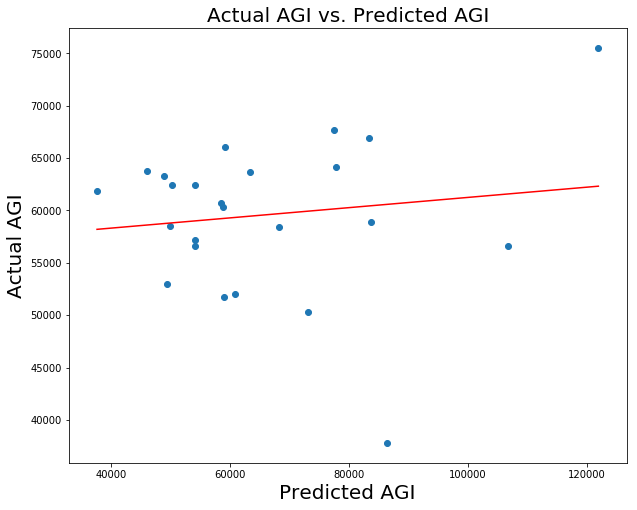

In [9]:
# Graphing true values vs. predicted values
plt.figure(figsize=(10,8), facecolor='w')
plt.title('Actual AGI vs. Predicted AGI', fontsize = 20)
plt.ylabel('Actual AGI', fontsize = 20)
plt.xlabel('Predicted AGI', fontsize = 20)
plt.plot(np.unique(y_test), 
         np.poly1d(np.polyfit(y_test, y_hat, 1))(np.unique(y_test)),
         color = 'red')
plt.scatter(y_test, y_hat);
# plt.savefig('../images/xgboost1.png', bbox_inches='tight')